In [54]:
from pathlib import Path
import  numpy as np, cv2, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [53]:
DATA_DIR = r"C:\Users\vennt\Desktop\Live\pics"
IMG_SIZE = (128, 128)

In [57]:
def load_iamges_labels(folder):
    paths = sorted(Path(folder).glob("*.jpg"))

    imgs = []
    labels = []

    for p in paths:
        img = cv2.imread(str(p))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        imgs.append(img)
        labels.append(int(str(p).split("_")[-1].split(".")[0]))

    return imgs, labels


In [58]:
imgs, labels = load_iamges_labels(DATA_DIR)

In [60]:
len(imgs)

250

In [62]:
len(labels)

250

In [63]:
def preprocess_image(img, target_size=IMG_SIZE):
    return cv2.resize(img, target_size)


def preprocess_batch(imgs, target_size=IMG_SIZE):
    out = [preprocess_image(img, target_size) for img in imgs]
    out = np.asarray(out) / 255
    return out


In [71]:
y = np.asarray(labels)

In [72]:
y

array([ 91,  52,  85,  92,  85,  85,  52,  45, 135,  92, 135, 135,  86,
       135,  86,  52,  92, 135,  85,  52,  45,  90, 135, 135, 135, 135,
        45,  85,  85,  45,  93,  91,  46, 135, 135,  52,  47,  93,  52,
        46,  85,  85,  45,  45,  52, 135,  52,  45,  52, 135,  52, 135,
        51,  85, 135,  92,  85,  90,  45,  85, 135, 135, 135,  85,  85,
        46,  45,  92, 135,  45,  91, 135,  45,  45, 135,  52,  91,  92,
        85,  46,  45,  85,  52,  45,  86, 135,  92,  92, 135, 135,  45,
        52,  52, 135,  86,  52,  91,  85,  85,  51, 135,  86,  46, 135,
        91, 135,  45,  52,  90,  85,  46,  51,  45, 135,  52, 135, 135,
        85,  93, 135, 135,  91,  90,  86,  51,  51, 135,  85,  52,  91,
        93,  52,  51,  52,  45,  92,  45, 135,  92,  46, 135,  92,  92,
        51,  45,  85, 135,  85,  45,  93,  90,  52, 135, 135, 135,  85,
        92, 135,  85,  52,  45,  93,  52,  91,  92,  85,  45,  51,  52,
        45,  51,  91,  51,  85,  85,  45,  85,  93,  85, 135,  5

In [64]:
X = preprocess_batch(imgs)

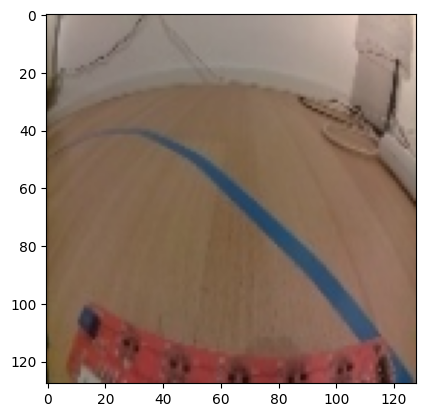

In [70]:
plt.imshow(X[19, :, :, :])

In [73]:
def show_examples(images, labels, n=8, title="Beispiele"):
    n = min(n, len(images))
    idx = np.random.choice(len(images), n, replace=False)
    cols = 4; rows = int(np.ceil(n / cols))
    plt.figure(figsize=(12, 3*rows))
    for i, j in enumerate(idx, 1):
        plt.subplot(rows, cols, i)
        img = images[j]
        if img.dtype != np.uint8:
            img = (np.clip(img, 0, 1) * 255).astype(np.uint8)
        plt.imshow(img); plt.title(f"Label: {labels[j]}"); plt.axis("off")
    plt.suptitle(title); plt.tight_layout(); plt.show()

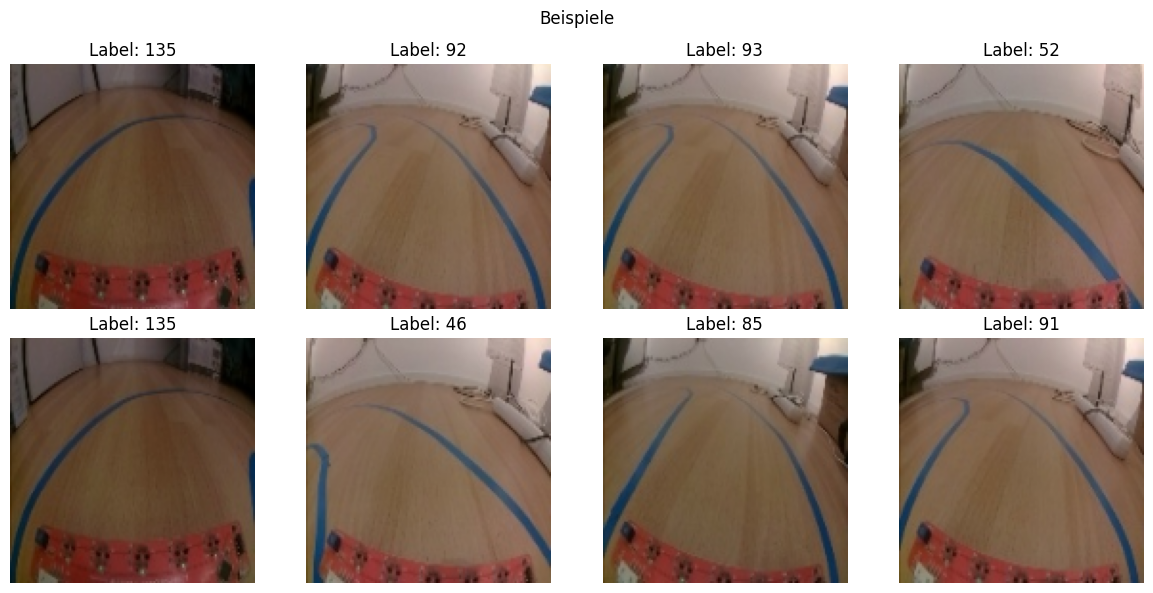

In [74]:
show_examples(X, y)

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
X_train.shape

(200, 128, 128, 3)

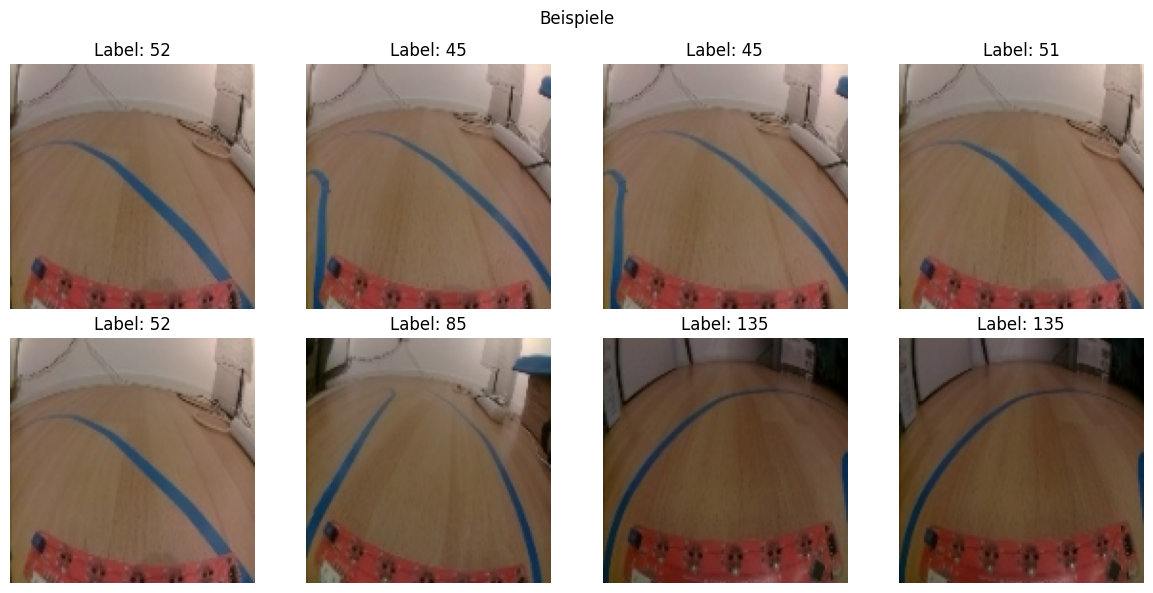

In [77]:
show_examples(X_train, y_train)

In [78]:
def mirror_with_label(images, labels):
    X_m = [ img[:,::-1, :]  for img in images]
    y_m = [180 - label for label in labels]

    return X_m, y_m

In [79]:
X_train_m, y_train_m = mirror_with_label(X_train, y_train)

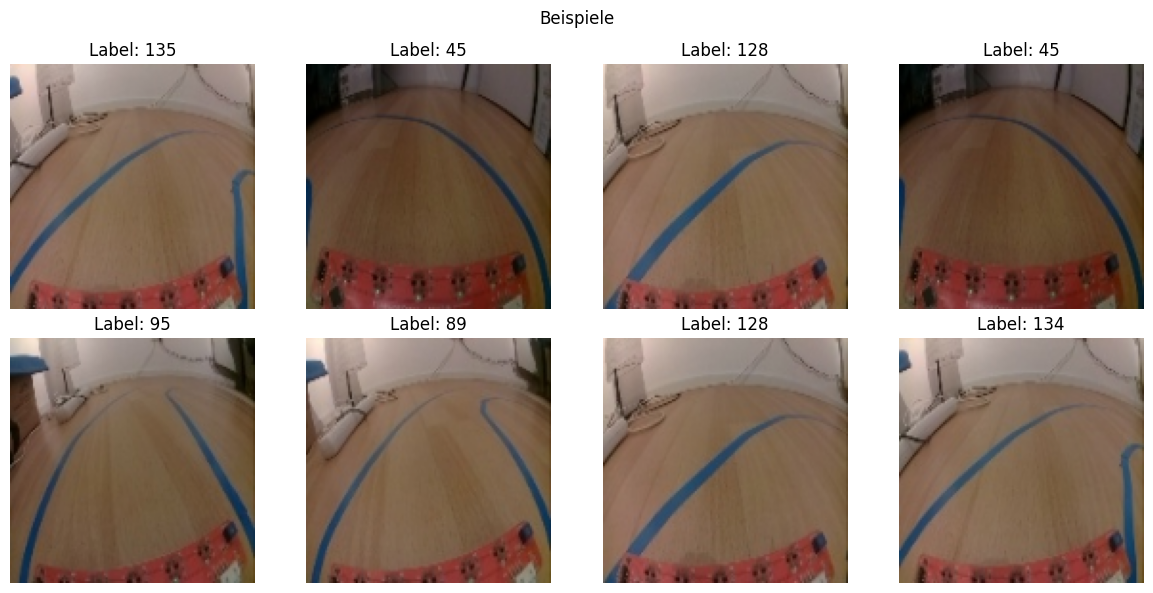

In [81]:
show_examples(X_train_m, y_train_m)

In [89]:
X_train_pool = np.concatenate([X_train , X_train_m])
y_train_pool = np.concatenate([y_train , y_train_m])

In [90]:
X_train_pool.shape

(400, 128, 128, 3)

In [91]:
y_train_pool.shape

(400,)

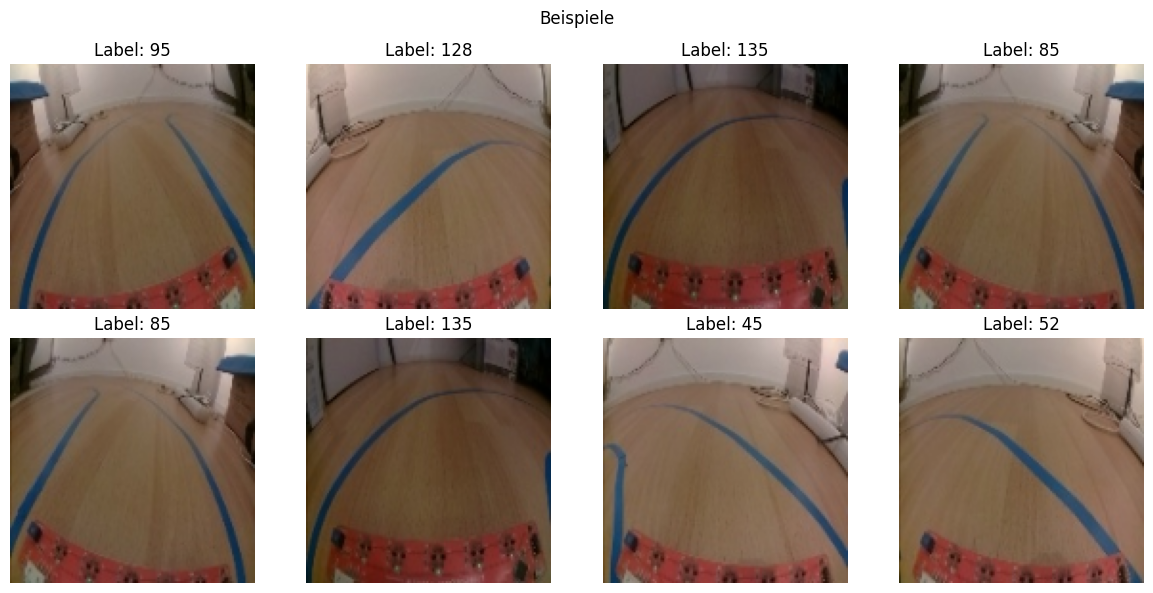

In [92]:
show_examples(X_train_pool, y_train_pool)

(array([19.,  0.,  0.,  0.,  5., 15.,  0.,  0.,  0., 11.]),
 array([ 45.,  54.,  63.,  72.,  81.,  90.,  99., 108., 117., 126., 135.]),
 <BarContainer object of 10 artists>)

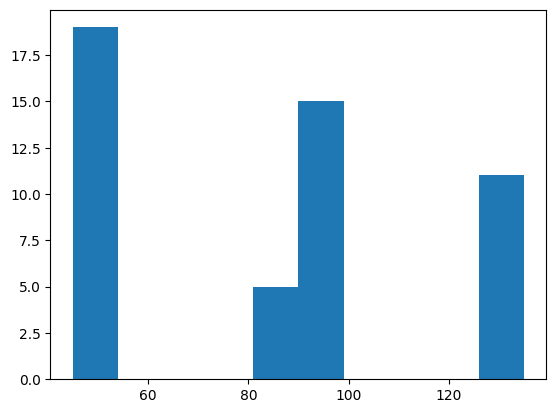

In [94]:
plt.hist(y_test)

In [95]:
size = (*IMG_SIZE, 3)
size


(128, 128, 3)

In [122]:
model = keras.Sequential([
    layers.Input(shape=size),
    layers.Conv2D(16, (3, 3), activation="relu"),
    layers.MaxPooling2D(2),
    layers.Conv2D(32, (5, 5), activation="relu"),
    layers.MaxPooling2D(2),
    layers.Dropout(0.25),
    #layers.Conv2D(64, (3, 3), activation="relu"),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.25),
    layers.Dense(1)
])


In [123]:
model.compile(optimizer="adam", loss="mse", metrics=["mae"])

In [124]:
history = model.fit(X_train_pool, y_train_pool, epochs=10, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 181ms/step - loss: 4908.3096 - mae: 59.3044 - val_loss: 1235.7775 - val_mae: 28.1840
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 154ms/step - loss: 1667.4552 - mae: 33.0407 - val_loss: 647.4976 - val_mae: 22.3720
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 154ms/step - loss: 1328.3540 - mae: 30.6382 - val_loss: 783.3399 - val_mae: 24.2449
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 154ms/step - loss: 1062.2439 - mae: 26.7092 - val_loss: 1391.3676 - val_mae: 32.5250
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 151ms/step - loss: 1058.0256 - mae: 27.3608 - val_loss: 969.4147 - val_mae: 26.0243
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 179ms/step - loss: 968.2911 - mae: 26.0889 - val_loss: 744.6205 - val_mae: 24.4726
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 146ms/step - loss: 631.3022 - mae: 21.4316 - val_loss: 590.0966 - val_mae: 21.9182
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 147ms/step - loss: 487.0026 - mae: 18.6649 - val_loss: 355.8092 - val_mae: 17.3713
E

In [125]:
303**0.5

17.406895185529212

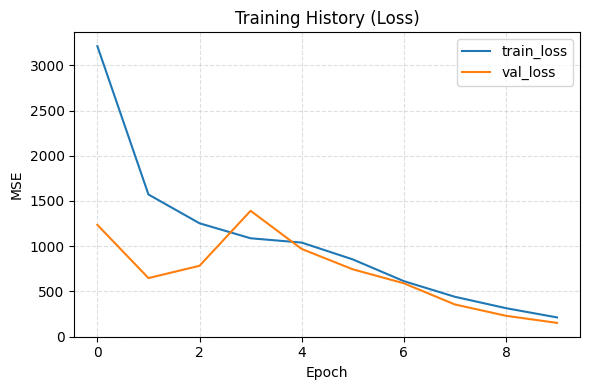

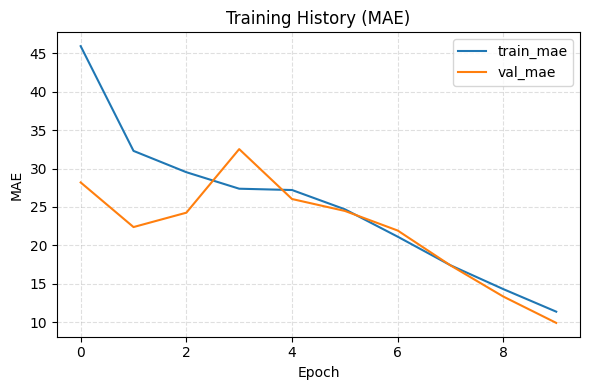

In [126]:
# History-Plots
plt.figure(figsize=(6,4))
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.xlabel("Epoch"); plt.ylabel("MSE"); plt.title("Training History (Loss)")
plt.legend(); plt.grid(True, linestyle="--", alpha=0.4); plt.tight_layout(); plt.show()

plt.figure(figsize=(6,4))
plt.plot(history.history["mae"], label="train_mae")
plt.plot(history.history["val_mae"], label="val_mae")
plt.xlabel("Epoch"); plt.ylabel("MAE"); plt.title("Training History (MAE)")
plt.legend(); plt.grid(True, linestyle="--", alpha=0.4); plt.tight_layout(); plt.show()


In [140]:
%%timeit
y_pred = model.predict(X_test).ravel()

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 306ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
216 ms ± 21.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [142]:
%%timeit
y_pred = model(X_test)

139 ms ± 32.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [128]:
y_pred

array([ 84.55375 ,  53.687046,  92.80048 , 132.489   ,  57.215824,
        55.451965,  56.800827,  86.60503 ,  84.419685,  85.115685,
       129.06633 ,  54.18837 ,  93.507576,  57.81269 ,  83.59199 ,
        56.12293 ,  54.169464,  53.45922 ,  86.187996, 131.70323 ,
        55.833412,  52.59844 ,  49.81257 ,  85.41276 ,  93.30016 ,
       128.53047 ,  84.385056, 128.4532  ,  84.27809 , 129.33702 ,
        85.80893 , 130.79256 ,  85.2087  ,  56.573174, 127.69529 ,
        51.93872 ,  92.062355,  87.12704 ,  52.787216,  52.6681  ,
        84.97209 ,  84.156654,  82.64446 ,  57.10401 ,  83.19146 ,
        84.800514, 130.02052 ,  55.38083 ,  90.251015,  49.26671 ],
      dtype=float32)

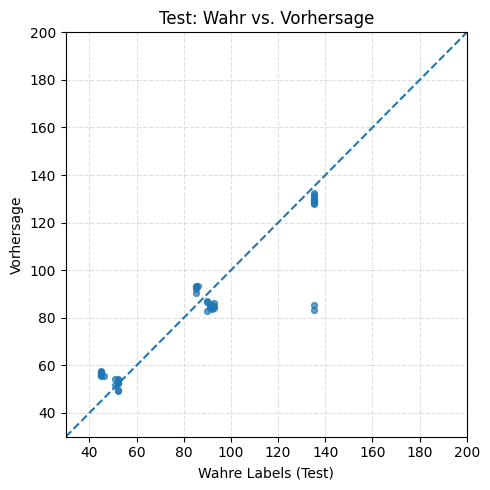

In [129]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred, s=18, alpha=0.7)
plt.plot([30,200],[30,200], linestyle="--")
plt.xlim(30,200); plt.ylim(30,200)
plt.xlabel("Wahre Labels (Test)"); plt.ylabel("Vorhersage")
plt.title("Test: Wahr vs. Vorhersage"); plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

In [130]:
error = np.abs(y_pred - y_test)

In [131]:
error

array([ 7.44625092,  1.68704605,  7.8004837 ,  2.51100159, 12.21582413,
        9.45196533, 11.80082703,  3.39497375,  7.58031464,  5.88431549,
        5.93367004,  2.18836975,  7.50757599, 12.81269073,  8.40801239,
       11.12292862,  3.16946411,  1.45922089,  6.81200409,  3.29676819,
       10.83341217,  0.59843826,  2.18743134, 49.58724213,  8.30016327,
        6.4695282 ,  7.61494446,  6.54679871,  8.72190857,  5.66297913,
        5.19107056,  4.20744324,  6.79129791, 11.57317352,  7.30471039,
        0.9387207 ,  7.06235504,  2.87296295,  0.78721619,  0.66809845,
        8.02790833,  6.84334564,  7.35553741, 12.10401154, 51.80854034,
        7.19948578,  4.97947693, 10.38082886,  5.25101471,  2.73329163])

In [132]:
np.argmax(error)

44

In [133]:
y_test[23]

135

In [134]:
y_pred[23]

85.41276

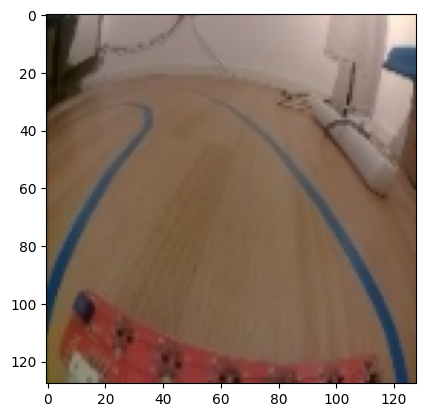

In [135]:
plt.imshow(X_test[23, :,: ,:])

In [136]:
model.save("live_model.keras")

In [137]:
import tensorflow as tf

# Auf Windows in tflite konvertieren

In [138]:
model = tf.keras.models.load_model("live_model.keras")

In [139]:
# 2) TFLite-Konverter
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# 3) Speichern
with open("live_model_fp32.tflite", "wb") as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\vennt\AppData\Local\Temp\tmp4_cxod56\assets


INFO:tensorflow:Assets written to: C:\Users\vennt\AppData\Local\Temp\tmp4_cxod56\assets


Saved artifact at 'C:\Users\vennt\AppData\Local\Temp\tmp4_cxod56'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name='input_layer_10')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  2275620895632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2275752265872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2275752263952: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2275752266832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2275752265488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2275752264912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2275752264528: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2275752279888: TensorSpec(shape=(), dtype=tf.resource, name=None)


# Auf RASPI

In [ ]:
%python3 -m pip install tflite-runtime

In [ ]:
import tflite_runtime.interpreter as tflite
from basisklassen_cam import Camera
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [ ]:
interpreter = tflite.Interpreter(model_path="/home/pi/Desktop/git/c2c_Phase2/Software/live_model_fp32.tflite") # path=Pfad zur .tflite Datei
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
interpreter.allocate_tensors()

In [ ]:
cam = Camera(colorspace="rgb")
img = cam.get_frame()

img = cv2.resize(img, (128, 128)).astype(np.float32)/255

In [ ]:

plt.imshow(img)

In [ ]:
img = np.expand_dims(img, axis=0)

In [ ]:
interpreter.set_tensor(input_details[0]['index'], img)
interpreter.invoke()
output_data = interpreter.get_tensor(output_details[0]['index'])
int(output_data)